# Problem Set 1 - Neural Network Implementation

Problem-set-1-ps1_group_guijarro, Jiayu Yang (213444) and Alvaro Guijarro (226883)

Discliamer: Due to the limited level of programming skills, we asked ChatGPT for some guidance and suggestions in completing the assignment and marked the corresponding sections.

As described in section "3 Neural network implementation" of assignment 1, the goal is to build a Feed-forward Neural Network for classification using different approaches. To validate that your code is working and that the network is actually learning something, you can use the MNIST dataset. Finally, please submit proof of the learning progress as described in the assignment.

## Imports

In [7]:
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from network_scratch import NeuralNetwork
from network_pytorch import NeuralNetworkTorch
from network_tensorflow import NeuralNetworkTf, TimeBasedLearningRate
import utils
import torchvision as tv
import torch

tf.config.run_functions_eagerly(True)

In [8]:
# Automatically load changes in imported modules
%load_ext autoreload
%autoreload 2

# Explicitly set seed for reproducibility
GLOBAL_RANDOM_STATE = 42

random.seed(GLOBAL_RANDOM_STATE)
np.random.seed(GLOBAL_RANDOM_STATE)

## A) Neural Network Classifier from Scratch

### Data


In [9]:
# Download MNIST dataset
x, y = fetch_openml('mnist_784', version=1, return_X_y=True, cache=True, as_frame=False)

# Preprocess dataset
x = (x / 255).astype('float32')
y = tf.keras.utils.to_categorical(y)

# Use only small subset of data for faster training
x = x[:1000]
y = y[:1000]

# Split data into train and validation set
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=GLOBAL_RANDOM_STATE)

c:\Users\yangj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


### ML Model & Training

In [13]:
dnn = NeuralNetwork([x_train.shape[1], 2**7, 2**6, 10], learning_rate=1.5, epochs=50)
history = dnn.fit(x_train, y_train, x_val, y_val)

Epoch: 1, Training Time: 0.55s, Training Accuracy: 74.12%, Validation Accuracy: 68.50%
Epoch: 2, Training Time: 1.16s, Training Accuracy: 87.50%, Validation Accuracy: 79.50%
Epoch: 3, Training Time: 1.73s, Training Accuracy: 92.62%, Validation Accuracy: 82.00%
Epoch: 4, Training Time: 2.29s, Training Accuracy: 95.38%, Validation Accuracy: 83.00%
Epoch: 5, Training Time: 2.84s, Training Accuracy: 95.88%, Validation Accuracy: 83.00%
Epoch: 6, Training Time: 3.40s, Training Accuracy: 97.38%, Validation Accuracy: 84.50%
Epoch: 7, Training Time: 3.95s, Training Accuracy: 98.00%, Validation Accuracy: 87.00%
Epoch: 8, Training Time: 4.51s, Training Accuracy: 98.50%, Validation Accuracy: 86.50%
Epoch: 9, Training Time: 5.06s, Training Accuracy: 98.75%, Validation Accuracy: 85.50%
Epoch: 10, Training Time: 5.61s, Training Accuracy: 98.75%, Validation Accuracy: 87.00%
Epoch: 11, Training Time: 6.16s, Training Accuracy: 99.12%, Validation Accuracy: 86.50%
Epoch: 12, Training Time: 6.71s, Training

### Evaluation

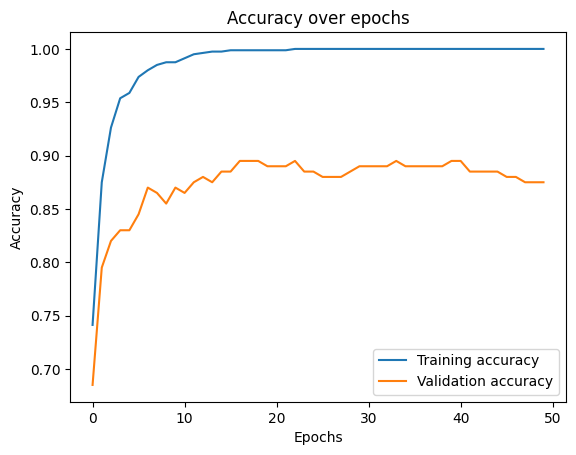

In [14]:
plt.plot(history['accuracy'], label='Training accuracy')
plt.plot(history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## B) Neural Network Classifier using PyTorch

### Data

In [15]:
# Define data preprocessing steps
transform = tv.transforms.Compose([
                tv.transforms.ToTensor(),
                tv.transforms.Normalize((0.5,), (0.5,))
            ])

# Download MNIST dataset
train_set = tv.datasets.MNIST('data', train=True, download=True, transform=transform)
val_set = tv.datasets.MNIST('data', train=False, download=True, transform=transform)

# Use only small subset of data for faster training
train_set = torch.utils.data.Subset(train_set, range(1000))
val_set = torch.utils.data.Subset(val_set, range(1000))

# Utilize PyTorch DataLoader from simplified & harmonized loading of data
train_loader = torch.utils.data.DataLoader(train_set, batch_size=1)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=1)

100.0%


Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw


100.0%


Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw



100.0%


Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw



100.0%

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



### ML Model & Training

In [17]:
model = NeuralNetworkTorch(sizes=[784, 2**7, 2**6, 10], learning_rate=1.5, epochs=50, random_state=GLOBAL_RANDOM_STATE)
history_torch = model.fit(train_loader, val_loader)

Epoch: 1, Training Time: 1.69s, Learning Rate: 1.5, Training Accuracy: 55.30%, Validation Accuracy: 50.70%
Epoch: 2, Training Time: 3.37s, Learning Rate: 1.5, Training Accuracy: 59.60%, Validation Accuracy: 53.30%
Epoch: 3, Training Time: 5.00s, Learning Rate: 1.5, Training Accuracy: 69.20%, Validation Accuracy: 60.90%
Epoch: 4, Training Time: 6.75s, Learning Rate: 1.5, Training Accuracy: 68.80%, Validation Accuracy: 59.90%
Epoch: 5, Training Time: 8.38s, Learning Rate: 1.5, Training Accuracy: 68.70%, Validation Accuracy: 61.90%
Epoch: 6, Training Time: 10.05s, Learning Rate: 1.5, Training Accuracy: 62.60%, Validation Accuracy: 56.60%
Epoch: 7, Training Time: 11.73s, Learning Rate: 1.5, Training Accuracy: 67.50%, Validation Accuracy: 59.20%
Epoch: 8, Training Time: 13.43s, Learning Rate: 1.5, Training Accuracy: 54.90%, Validation Accuracy: 46.10%
Epoch: 9, Training Time: 15.15s, Learning Rate: 1.5, Training Accuracy: 63.40%, Validation Accuracy: 57.90%
Epoch: 10, Training Time: 16.83s,

### Evaluation

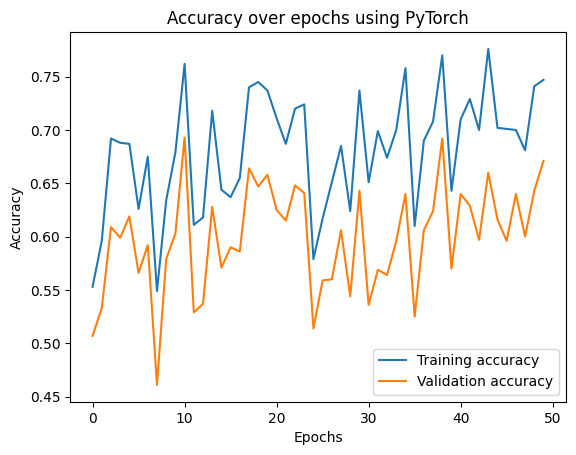

In [18]:
plt.plot(history_torch['accuracy'], label='Training accuracy')
plt.plot(history_torch['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy over epochs using PyTorch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## C) Neural Network Classifier using Keras

### Data

In [19]:
# Download MNIST dataset
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.mnist.load_data()

# Preprocess dataset
x_train = x_train.astype('float32') / 255
x_val = x_val.astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train)
y_val = tf.keras.utils.to_categorical(y_val)

# Use only small subset of data for faster training
x_train = x_train[:1000]
y_train = y_train[:1000]

x_val = x_val[:1000]
y_val = y_val[:1000]

### ML Model & Training

In [22]:
model_tf = NeuralNetworkTf(sizes=[784, 2**7, 2**5, 10])
tb_learning_rate = TimeBasedLearningRate(10)

[autoreload of network_tensorflow failed: Traceback (most recent call last):
  File "C:\Users\yangj\AppData\Roaming\Python\Python311\site-packages\IPython\extensions\autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\yangj\AppData\Roaming\Python\Python311\site-packages\IPython\extensions\autoreload.py", line 500, in superreload
    update_generic(old_obj, new_obj)
  File "C:\Users\yangj\AppData\Roaming\Python\Python311\site-packages\IPython\extensions\autoreload.py", line 397, in update_generic
    update(a, b)
  File "C:\Users\yangj\AppData\Roaming\Python\Python311\site-packages\IPython\extensions\autoreload.py", line 349, in update_class
    if update_generic(old_obj, new_obj):
       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\yangj\AppData\Roaming\Python\Python311\site-packages\IPython\extensions\autoreload.py", line 397, in update_generic
    update(a, b)
  File "C:\Users\yangj\AppData\Roaming\Python\Python311\site-packages\IPyth

In [23]:
history_tf = model_tf.compile_and_fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50, learning_rate=tb_learning_rate, batch_size=1)

ValueError: Attempt to convert a value (None) with an unsupported type (<class 'NoneType'>) to a Tensor.

### Evaluation

In [ ]:
plt.plot(history_torch['accuracy'], label='Training accuracy')
plt.plot(history_torch['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy over epochs using PyTorch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()